# Projet n°7 - Effectuez une prédiction de revenus

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Import de modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.compat import lzip

## Paramètres seaborn

In [3]:
sns.set_context('talk')
sns.set_style('darkgrid')

## Lecture du DF

In [4]:
df = pd.read_csv('data-projet7.csv')

In [5]:
df.head()

# GDP = Gross Domestic Product
# PPP = Purchase power parity

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


In [7]:
df.year_survey.unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

In [8]:
df['income'] =  df['income'].str.replace(',','.')
df['income'] = df['income'].astype('float')

In [9]:
df['gdpppp'] =  df['gdpppp'].str.replace(',','.')
df['gdpppp'] = df['gdpppp'].astype('float')

In [10]:
df.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


## Mission n°1

In [11]:
# années des données
df.year_survey.unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

In [12]:
# nombre de pays présents
len(df.country.unique())

116

In [13]:
# type de quantile = centile
df.nb_quantiles.unique()

array([100], dtype=int64)

Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

Oui, pour plusieurs raisons :
- cela permet de partitionner les habitants en fonction des revenus. On peut isoler/retirer une certaine partie de la population
- cela permet de comparer un quantile entre les pays
    
Limites :
- Une séparation en centile n'est pas assez précise, car dans la classe 100, il y a les riches et les super riches

In [14]:
import csv

### Lecture d'un DF avec les populations

In [15]:
pop = pd.read_csv('pop_databank/pop.csv', engine= 'python', quoting=3)

In [16]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, Population to Population
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ï»¿Series Name  217 non-null    object
 1   Series Code     217 non-null    object
 2   Country Name    217 non-null    object
 3   Country Code    217 non-null    object
 4   2006 [YR2006]   217 non-null    int64 
 5   2007 [YR2007]   217 non-null    int64 
 6   2008 [YR2008]   217 non-null    object
dtypes: int64(2), object(5)
memory usage: 13.6+ KB


In [17]:
pop.head()

,ï»¿Series Name,Series Code,Country Name,Country Code,2006 [YR2006],2007 [YR2007],2008 [YR2008]
Population,total,SP.POP.TOTL,Afghanistan,AFG,26433049,27100536,27722276
Population,total,SP.POP.TOTL,Albania,ALB,2992547,2970017,2947314
Population,total,SP.POP.TOTL,Algeria,DZA,33641002,34166972,34730608
Population,total,SP.POP.TOTL,American Samoa,ASM,59107,58365,57492
Population,total,SP.POP.TOTL,Andorra,AND,80993,82684,83862


#### Nettoyage de pop

In [18]:
pop = pop.reset_index()

In [19]:
pop = pop [['Country Name', 'Country Code', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]']]
pop.columns = ['country_name', 'country', 'pop_2006', 'pop_2007', 'pop_2008']

In [20]:
pop = pop.replace('"',"")

In [21]:
pop['pop_2008'] = pop['pop_2008'].str.replace('"', '')
pop['country_name'] = pop['country_name'].str.replace('"', '')

In [22]:
pop[pop['country'] == 'COD']

,country_name,country,pop_2006,pop_2007,pop_2008
44,Congo. Dem. Rep.,COD,56578037,58453683,60411195


In [23]:
# Ajout d'un quantile manquant
ltu41 = (df[(df['country'] == 'LTU')&(df['quantile'] == 40)]['income'].values + df[(df['country'] == 'LTU')&(df['quantile'] == 42)]['income'].values)/2
ltu41 = ltu41[0]

In [24]:
ltu41serie = pd.Series({'country' : 'LTU', 'year_survey' : 2008, 'quantile': 41, 'nb_quantiles' : 100, 'income' : ltu41, 'gdpppp': 17571.0})
df = df.append(ltu41serie, ignore_index=True)

### Merge entre pop et df : df1

In [25]:
df = df.sort_values(['country', 'quantile'])

In [26]:
df1 = pd.merge(df, pop, on='country', how='left')
len(df1.country.unique())

116

In [27]:
df1 = df1.set_index('country')

#### Nettoyage de df1

In [28]:
df1[(df1.index == 'LTU')&(df1['quantile'] == 40)]['income']

country
LTU    4868.4507
Name: income, dtype: float64

In [29]:
df1[(df1.index == 'LTU')&(df1['quantile'] == 41)]

,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,pop_2006,pop_2007,pop_2008
country,,,,,,,,,
LTU,2008,41,100,4882.14065,17571.0,Lithuania,3269909.0,3231294.0,3198231


In [30]:
# Ajout d'informations manquantes

df1.loc['TWN', 'pop_2006'] = 22823848
df1.loc['TWN', 'pop_2007'] = 22927215
df1.loc['TWN', 'pop_2008'] = 23019045


# source : https://www.worldometers.info/world-population/taiwan-population/

In [31]:
df1[df1['gdpppp'].isna()]

,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,pop_2006,pop_2007,pop_2008
country,,,,,,,,,
PSE,2009,1,100,195.28990,NaN,West Bank and Gaza,3406334.0,3494496.0,3591977
PSE,2009,2,100,264.36533,NaN,West Bank and Gaza,3406334.0,3494496.0,3591977
PSE,2009,3,100,301.44672,NaN,West Bank and Gaza,3406334.0,3494496.0,3591977
PSE,2009,4,100,329.83392,NaN,West Bank and Gaza,3406334.0,3494496.0,3591977
PSE,2009,5,100,348.76495,NaN,West Bank and Gaza,3406334.0,3494496.0,3591977
...,...,...,...,...,...,...,...,...,...
XKX,2008,96,100,5155.36470,NaN,Kosovo,1719536.0,1733404.0,1747383
XKX,2008,97,100,5689.52930,NaN,Kosovo,1719536.0,1733404.0,1747383
XKX,2008,98,100,6233.73930,NaN,Kosovo,1719536.0,1733404.0,1747383


In [32]:
# Ajout d'informations manquantes
df1.loc['XKX', 'gdpppp'] = 7249.5 #source : https://databank.worldbank.org/  indicateur : GDP, PPP (constant 2017 international $)
df1.loc['PSE', 'gdpppp'] = 3155   #source : https://knoema.com/atlas/Palestine/GDP-per-capita-based-on-PPP

Il manquait les populations de Taiwan, et le gdpppp de XKX et PSE. Ces informations ont été ajoutées.

In [33]:
# pivot du df
df2 = pd.pivot_table(df1, index=['country','pop_2006','pop_2007', 'pop_2008', 'gdpppp'], columns=['quantile'], values=['income'])

In [34]:
df2 = df2.reset_index()

In [35]:
df2[df2['country'] == 'FJI']

country  pop_2006  pop_2007 pop_2008     gdpppp     income            \
quantile                                                          1         2   
33           FJI  827870.0  836190.0   845361  4300332.0  308.17334  384.3323   

                                          ...                                  \
quantile          3          4         5  ...         91        92         93   
33        436.59265  486.81436  520.1972  ...  3941.2346  4182.607  4409.8716   

                                                                       \
quantile         94       95        96        97         98        99   
33        4695.8613  5062.31  5481.082  6205.614  7265.1255  9553.192   

                    
quantile       100  
33        22161.59  

[1 rows x 105 columns]

In [36]:
# Modification du type de données
pop['pop_2008'] = pop['pop_2008'].astype('int64')
df2['pop_2008'] = df2['pop_2008'].astype('int64')

## calcul de la population

In [37]:
df2['pop_2008'].sum() / pop['pop_2008'].sum()

0.9212699400549573

In [38]:
pop['pop_2008'].sum()

6733923642

In [39]:
# Pays les plus peuplés
df2.sort_values('pop_2008', ascending= False)

country      pop_2006      pop_2007    pop_2008        gdpppp  \
quantile                                                                 
17           CHN  1.311020e+09  1.317885e+09  1324655000  5.712000e+03   
45           IND  1.165486e+09  1.183209e+09  1200669765  2.796000e+03   
110          USA  2.983799e+08  3.012312e+08   304093966  4.326100e+04   
44           IDN  2.293183e+08  2.323742e+08   235469762  3.689000e+03   
12           BRA  1.881674e+08  1.901304e+08   192030362  9.559000e+03   
..           ...           ...           ...         ...           ...   
33           FJI  8.278700e+05  8.361900e+05      845361  4.300332e+06   
13           BTN  6.574100e+05  6.648760e+05      671613  4.525483e+03   
71           MNE  6.150250e+05  6.158750e+05      616969  1.055600e+04   
63           LUX  4.726370e+05  4.799930e+05      488650  7.312700e+04   
49           ISL  3.037820e+05  3.115660e+05      317414  3.652700e+04   

               income                                                    ...  \
quantile            1           2           3            4            5  ...   
17          16.719418   234.15073   282.89490    323.82650    362.26060  ...   
45         247.838730   299.82278   324.62790    342.13678    357.88535  ...   
110        663.476100  1698.08680  2439.73540   3054.24780   3627.54830  ...   
44         306.276430   369.63007   401.95374    425.47750    445.92395  ...   
12         144.028460   245.92259   347.86597    430.76090    506.10590  ...   
..                ...         ...         ...          ...          ...  ...   
33         308.173340   384.33230   436.59265    486.81436    520.19720  ...   
13         254.016780   324.88437   360.73020    394.91174    420.55325  ...   
71        1344.219500  1893.51670  2072.87570   2272.33760   2379.25000  ...   
63        5780.837400  7315.26860  7891.24560   8312.03100   8945.63800  ...   
49        5191.968300  8185.87200  9188.14600  10159.22700  10884.47500  ...   

                                                                      \
quantile          91          92          93          94          95   
17         5629.4590   5910.5156   6220.7820   6565.0327   6997.9136   
45         1631.8744   1715.9994   1815.1792   1929.2941   2067.4102   
110       50866.3600  53313.9600  56233.7400  59764.7030  64053.3500   
44         2365.5276   2483.6360   2627.8770   2802.6096   3003.0660   
12        10205.2390  11006.5200  11915.4370  13043.2280  14480.1500   
..               ...         ...         ...         ...         ...   
33         3941.2346   4182.6070   4409.8716   4695.8613   5062.3100   
13         2897.7993   3045.5432   3224.7864   3425.0660   3685.5034   
71        10966.6350  11427.1420  12023.6400  12635.1320  13422.8010   
63        42178.2900  43667.9600  46151.1250  48686.7970  51153.3050   
49        42450.7270  44106.1880  46007.6330  48177.1800  50764.2270   

                                                                        
quantile          96          97          98           99          100  
17         7588.1950   8317.5530   9382.2840   11071.5100   17091.4040  
45         2245.9475   2492.9639   2843.0598    3473.3462    6176.5205  
110       69926.3700  77634.8200  88482.8400  106765.2600  176928.5500  
44         3284.7720   3658.9219   4192.0120    5309.6700   11594.2350  
12        16323.8210  18917.6910  22820.6680   29642.6200   59115.9800  
..               ...         ...         ...          ...          ...  
33         5481.0820   6205.6140   7265.1255    9553.1920   22161.5900  
13         3993.2480   4408.0660   4995.3657    5860.7017    8999.6390  
71        14345.7860  15932.7180  16653.5860   18752.9120   27919.8600  
63        53724.6300  58382.3120  65280.2200   77673.3700  114823.6800  
49        54079.0800  58772.3830  67783.4800   84655.5200  160645.2700  

[116 rows x 105 columns]

In [40]:
df2.sort_values('gdpppp', ascending= False).head(5)

#Erreur dans le gdp ppp de FJI

country     pop_2006     pop_2007   pop_2008     gdpppp      income  \
quantile                                                                   1   
33           FJI     827870.0     836190.0     845361  4300332.0   308.17334   
63           LUX     472637.0     479993.0     488650    73127.0  5780.83740   
81           NOR    4660677.0    4709153.0    4768212    49070.0  3520.26150   
110          USA  298379912.0  301231207.0  304093966    43261.0   663.47610   
46           IRL    4273591.0    4398942.0    4489544    39268.0  2819.13500   

                                                        ...              \
quantile          2           3           4          5  ...          91   
33         384.3323   436.59265   486.81436   520.1972  ...   3941.2346   
63        7315.2686  7891.24560  8312.03100  8945.6380  ...  42178.2900   
81        5978.4146  7153.79640  8225.68900  9013.9210  ...  35163.8800   
110       1698.0868  2439.73540  3054.24780  3627.5483  ...  50866.3600   
46        4758.8110  5422.59900  5861.07500  6226.1323  ...  29818.1860   

                                                                              \
quantile         92          93          94         95         96         97   
33         4182.607   4409.8716   4695.8613   5062.310   5481.082   6205.614   
63        43667.960  46151.1250  48686.7970  51153.305  53724.630  58382.312   
81        36132.990  37272.6330  38402.6680  39994.400  41779.010  44359.490   
110       53313.960  56233.7400  59764.7030  64053.350  69926.370  77634.820   
46        30804.588  31831.5720  32864.8240  34140.406  36361.387  39196.190   

                                             
quantile          98          99        100  
33         7265.1255    9553.192   22161.59  
63        65280.2200   77673.370  114823.68  
81        48223.7970   55106.970  120354.22  
110       88482.8400  106765.260  176928.55  
46        44047.2580   52114.543   96758.68  

[5 rows x 105 columns]

In [41]:
# Correction du gdp ppp de FJI
df2.loc[(df2.country == 'FJI'),'gdpppp'] = 7777 #https://databank.worldbank.org/  indicateur : GDP, PPP (constant 2017 international $)

In [42]:
df2.columns = ["_".join(str(v)) for v in df2.columns.values]

In [43]:
# Nettoyage
list1 = list(range(1,101))
list2 = ['country', 'pop_2006', 'pop_2007', 'pop_2008', 'gdpppp']
list1 = list2 + list1
df2.columns = list1

# Mission n°2

In [44]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [45]:
# Préparation des données
df3 = df2
df3 = df3.drop('pop_2006', axis=1)
df3 = df3.drop('pop_2007', axis=1)
df3 = df3.drop('pop_2008', axis=1)
df3 = df3.drop('gdpppp', axis=1)

In [46]:
df3.head()

,country,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,ALB,728.89795,916.66235,1010.91600,1086.90780,1132.69970,1171.14120,1201.1324,1240.8976,1285.69140,...,4965.6850,5144.8833,5348.7930,5619.4450,5860.9170,6231.0996,6822.3184,7775.8910,9351.7510,17754.324
1,ARG,254.08942,470.50150,623.45420,734.97455,832.31850,918.40800,1012.4612,1106.3810,1185.00710,...,12110.6680,12821.3530,13450.8620,14296.3990,15406.0590,16618.8730,18226.7300,20528.3050,24444.9500,43669.242
2,ARM,366.61780,535.32733,611.64560,658.33940,690.84710,721.91000,753.8348,784.9140,809.08760,...,2653.5796,2738.5073,2832.9912,2932.5605,3062.8557,3229.5537,3466.6650,3758.6018,4320.2896,6566.159
3,AUT,2958.07640,4893.46730,5459.64900,5923.58540,6380.27800,6779.26460,7056.4434,7316.1816,7581.05470,...,27365.6700,28057.9470,29231.5060,30725.9300,32304.8070,33914.1050,36080.9020,39450.5550,44950.3120,72216.680
4,AZE,397.53983,597.77320,705.47003,785.52610,841.75244,889.26465,932.3291,966.5682,1000.89575,...,4126.0790,4296.9224,4450.0737,4641.4956,4917.4424,5283.5470,5802.6380,6366.0590,7459.7114,12023.727


## Calcul du coefficient de gini pour l'ensemble des pays

In [47]:
df4 = df3.set_index('country')

In [48]:
X = df4
X = X.to_numpy()
X = np.sort(X) # tri des valeurs
list_gini= []
for c in range(0, len(X)): 
    n = 100
    i = np.arange(1, n + 1) # Index commençant à 1
    gini = (np.sum((2 * i - n  - 1) * X[c])) / (n * np.sum(X[c]))
    list_gini.append(gini)

In [49]:
df4['gini'] = list_gini

In [50]:
# Top 5 coef gini
df4.sort_values('gini').head(5)

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,gini
country,,,,,,,,,,,,,,,,,,,,,
SVN,2814.95300,3924.2173,4551.5674,4987.3280,5399.6714,5699.3975,5950.1035,6157.1777,6334.0234,6535.8145,...,19244.236,19834.9880,20656.2130,21413.580,22362.0600,23563.5530,25440.1700,28644.861,39012.440,0.230731
SVK,791.46204,1305.4708,1725.3300,2019.0306,2184.7773,2444.9807,2619.8123,2718.5640,2838.8987,2958.3370,...,9857.897,10072.5100,10402.1090,10862.534,11318.8125,11906.8560,12934.9130,14632.151,22350.904,0.247219
CZE,1586.24710,2322.1792,2741.5847,3067.3618,3395.3267,3607.9130,3802.4858,3974.2010,4111.6743,4231.9260,...,13224.458,13684.7970,14222.6740,14847.442,15697.9440,16827.3460,18643.3670,21536.416,37063.617,0.252864
SWE,2284.43290,4441.8184,5200.9600,5764.8370,6283.1150,6739.0205,7171.3090,7550.3564,7866.9790,8123.2950,...,26709.748,27528.8930,28395.2200,29452.309,30643.9120,32333.6800,34466.1170,38500.580,64328.734,0.254887
UKR,942.38495,1155.7863,1264.1605,1356.3184,1435.1147,1496.4120,1549.8065,1600.2544,1645.1298,1694.4039,...,5648.735,5827.9814,6033.0728,6288.579,6614.2666,7025.2324,7549.7246,8652.086,11564.171,0.255140


In [51]:
# Bottom 5 coef gini
df4.sort_values('gini').tail(5)

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,gini
country,,,,,,,,,,,,,,,,,,,,,
CAF,40.928130,62.714714,79.51492,91.46294,100.00194,106.962166,113.77636,120.580986,128.08023,136.84294,...,1669.2020,1802.1257,1951.6356,2147.0923,2444.9856,2912.4885,3599.8667,4951.775,14472.948,0.561732
GTM,38.463615,101.680466,145.08687,180.35335,211.16739,242.707180,268.93150,296.509160,320.69357,342.44583,...,4349.8210,4725.5327,5053.7188,5651.6216,6407.8105,7476.1035,9098.7330,12568.050,39799.406,0.568293
COL,62.605060,135.323790,191.87814,244.67137,290.17600,333.019260,374.20456,412.265100,452.72888,499.07080,...,7998.6055,8676.3660,9550.3460,10542.1250,11975.1240,13984.8500,16993.2970,22631.807,50671.125,0.569271
HND,50.166843,98.061290,138.90839,172.70879,204.63103,234.442340,262.87604,289.749180,313.52310,338.20676,...,7515.2065,8072.9250,8753.8560,9644.1290,10820.3090,12523.6440,15031.8810,19564.543,56265.700,0.601667
ZAF,60.490383,138.341550,192.29450,236.99400,279.36758,322.992650,358.57830,391.797600,423.93445,455.44156,...,15557.0470,17157.2230,19444.7050,21714.8930,24553.5680,28858.0310,35750.2900,46297.316,82408.550,0.669779


In [52]:
# Coef gini de la France
df4.sort_values('gini').reset_index()[df4.sort_values('gini').reset_index()['country'] == 'FRA']

,country,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,gini
39,FRA,2958.304,4412.6753,4939.635,5422.9165,5906.5376,6263.426,6617.146,6879.89,7149.1973,...,32203.807,33657.95,35429.945,37264.066,39873.51,43693.035,49489.582,60758.613,122775.164,0.329096


In [53]:
# Sélection des pays
list_code_country = ['SVN', 'HUN', 'FRA', 'USA', 'MEX', 'ZAF']

In [54]:
df4[df4.index.isin(list_code_country)]['gini']

country
FRA    0.329096
HUN    0.274149
MEX    0.507989
SVN    0.230731
USA    0.431799
ZAF    0.669779
Name: gini, dtype: float64

In [55]:
selected_countries = df4[df4.index.isin(list_code_country)]

In [56]:
selected_countries = selected_countries.sort_values('gini')

In [57]:
# modification du style de seaborn
sns.set('talk')

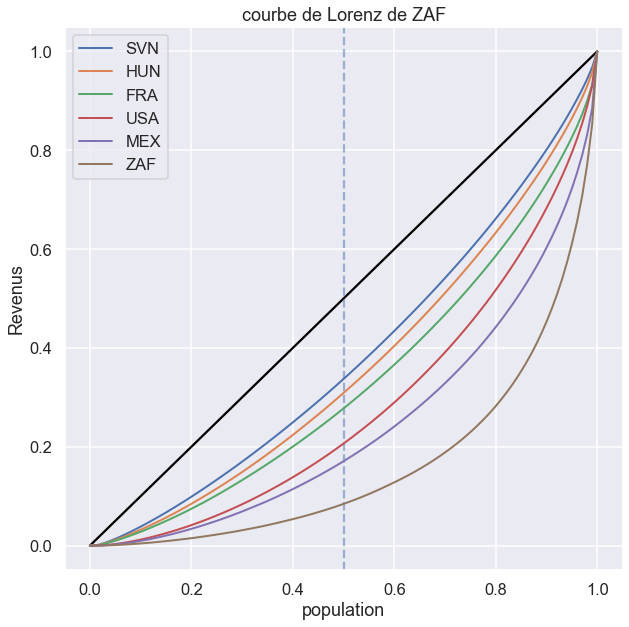

In [58]:
def lorenz(X):
    # On divise la somme cumulée par la somme 
    # afin avoir un résultat entre 0 et 1
    scaled_prefix_sum = X.cumsum() / X.sum()
    # On met en place la première valeur à 0
    return np.insert(scaled_prefix_sum, 0, 0)

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.plot([0,1], [0,1], c='black')
ax.axvline(0.5, linestyle='--', alpha=0.5)
for c in range(0, len(list_code_country)):
    X = selected_countries.iloc[c,:]
    X = X.to_numpy()
    X = np.sort(X) # tri des valeurs
    lorenz_curve = lorenz(X)
    ax.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, linewidth=2, label='{}'.format(list_code_country[c]))
    # on affiche une ligne de 0,0 à 1,1    
    ax.set_xlabel('''population''')    
    ax.set_ylabel('''Revenus''')
    ax.set_title('courbe de Lorenz de {}'.format(list_code_country[c]))    
    ax.legend()
    fig.savefig('Lorenz')
plt.show()

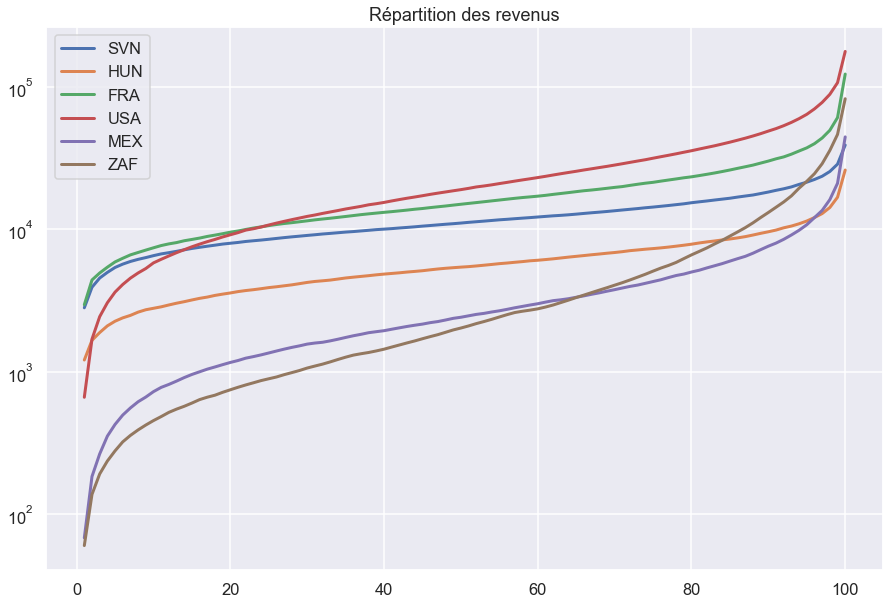

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
for c in range(0, len(list_code_country)):
    ax.plot(selected_countries.iloc[:,:-1].columns, selected_countries.iloc[c,:-1],linewidth=3, label='{}'.format(list_code_country[c]))
    ax.set_yscale('log')
    ax.set_label('test')
    ax.legend()
    ax.set_title('Répartition des revenus')
    
fig.savefig('repart_revenu')
plt.show()

## Evolution du coef gini dans le temps

In [60]:
ev_gini = pd.read_csv('ev_gini.csv')

In [61]:
ev_gini = ev_gini.loc[0:5]

In [62]:
ev_gini= ev_gini.replace(to_replace='..', value=np.nan)

In [63]:
ev_gini.iloc[:,-6:] = ev_gini.iloc[:,-6:].astype("float")

In [64]:
ev_gini.columns = ['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2006', '2007', '2008', '2009',
       '2010', '2011']

In [65]:
ev_gini = ev_gini.melt(id_vars='Country Name', value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name='année', value_name='gini')

In [66]:
ev_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  36 non-null     object 
 1   année         36 non-null     object 
 2   gini          25 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


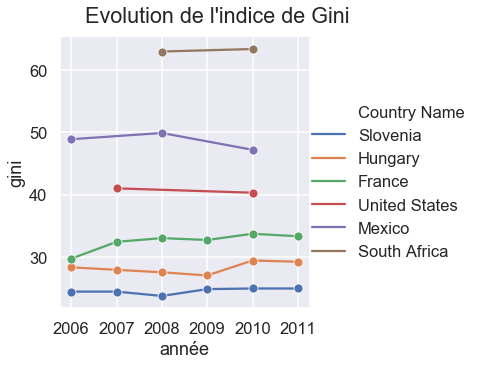

In [67]:
sns.set('talk')
g = sns.relplot(y='gini', x='année', data=ev_gini, kind='line', hue='Country Name', marker='o')
g.fig.suptitle('''Evolution de l'indice de Gini''', y=1.03)
plt.savefig('ev_gini')
plt.show()

## Mission n°3

In [68]:
# ajout du revenu moyen
df4['revenu_moyen'] = df4.mean(axis=1)

In [69]:
df4.head()

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,gini,revenu_moyen
country,,,,,,,,,,,,,,,,,,,,,
ALB,728.89795,916.66235,1010.91600,1086.90780,1132.69970,1171.14120,1201.1324,1240.8976,1285.69140,1325.25330,...,5348.7930,5619.4450,5860.9170,6231.0996,6822.3184,7775.8910,9351.7510,17754.324,0.304624,2965.181137
ARG,254.08942,470.50150,623.45420,734.97455,832.31850,918.40800,1012.4612,1106.3810,1185.00710,1269.69840,...,13450.8620,14296.3990,15406.0590,16618.8730,18226.7300,20528.3050,24444.9500,43669.242,0.449902,5789.989260
ARM,366.61780,535.32733,611.64560,658.33940,690.84710,721.91000,753.8348,784.9140,809.08760,830.59094,...,2832.9912,2932.5605,3062.8557,3229.5537,3466.6650,3758.6018,4320.2896,6566.159,0.263108,1612.262788
AUT,2958.07640,4893.46730,5459.64900,5923.58540,6380.27800,6779.26460,7056.4434,7316.1816,7581.05470,7759.38960,...,29231.5060,30725.9300,32304.8070,33914.1050,36080.9020,39450.5550,44950.3120,72216.680,0.278279,16472.874244
AZE,397.53983,597.77320,705.47003,785.52610,841.75244,889.26465,932.3291,966.5682,1000.89575,1030.93840,...,4450.0737,4641.4956,4917.4424,5283.5470,5802.6380,6366.0590,7459.7114,12023.727,0.312321,2334.091234


### Import du coef. d'élasticité

In [70]:
elas = pd.read_csv('GDIMMay2018.csv')

In [71]:
elas.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.1
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.1
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.1
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.1
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.1


In [72]:
elas.region.unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Latin America & Caribbean', 'High income', 'East Asia & Pacific',
       'Middle East & North Africa'], dtype=object)

In [73]:
elas[elas.region == 'High income']

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
159,Australia,AUS,AUS,High income,High-income economies,High income,0,HILDA,1940,Retrospective question,...,NaN,NaN,NaN,NaN,NaN,NaN,0.092941,0.048968,0.858091,NaN
160,Australia,AUS,AUS,High income,High-income economies,High income,0,HILDA,1940,Retrospective question,...,NaN,NaN,NaN,NaN,NaN,NaN,0.092941,0.048968,0.858091,NaN
161,Australia,AUS,AUS,High income,High-income economies,High income,0,HILDA,1940,Retrospective question,...,NaN,NaN,NaN,NaN,NaN,NaN,0.092941,0.048968,0.858091,NaN
162,Australia,AUS,AUS,High income,High-income economies,High income,0,HILDA,1940,Retrospective question,...,NaN,NaN,NaN,NaN,NaN,NaN,0.092941,0.048968,0.858091,NaN
163,Australia,AUS,AUS,High income,High-income economies,High income,0,HILDA,1940,Retrospective question,...,NaN,NaN,NaN,NaN,NaN,NaN,0.092941,0.048968,0.858091,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,United States,USA,USA,High income,High-income economies,High income,0,PSID,1980,Retrospective question,...,0.494587,NaN,NaN,174.0,0.000199,NaN,0.057830,0.043112,0.899058,0.15
6234,United States,USA,USA,High income,High-income economies,High income,0,PSID,1980,Retrospective question,...,0.614559,NaN,NaN,211.0,0.047873,NaN,0.057830,0.043112,0.899058,0.15
6235,United States,USA,USA,High income,High-income economies,High income,0,PSID,1980,Retrospective question,...,0.479184,NaN,NaN,569.0,0.038716,NaN,0.057830,0.043112,0.899058,0.15
6236,United States,USA,USA,High income,High-income economies,High income,0,PSID,1980,Retrospective question,...,0.561782,NaN,NaN,253.0,0.012825,NaN,0.057830,0.043112,0.899058,0.15


In [74]:
len(elas.countryname.unique())

150

In [75]:
elas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   countryname        6504 non-null   object 
 1   wbcode             6504 non-null   object 
 2   iso3               6504 non-null   object 
 3   region             6504 non-null   object 
 4   incgroup2          6504 non-null   object 
 5   incgroup4          6504 non-null   object 
 6   fragile            6504 non-null   int64  
 7   survey             6501 non-null   object 
 8   year               6504 non-null   int64  
 9   status             6501 non-null   object 
 10  cohort             6504 non-null   int64  
 11  parent             6504 non-null   object 
 12  child              6504 non-null   object 
 13  obs                6501 non-null   float64
 14  P1                 6501 non-null   float64
 15  P2                 6501 non-null   float64
 16  P3                 6501 

In [76]:
elas = elas[['countryname', 'wbcode', 'region', 'year', 'IGEincome']]

In [77]:
elas = elas.drop_duplicates().dropna()
elas = elas.set_index('wbcode')

In [78]:
elas = elas[['IGEincome']]

In [79]:
df5 = pd.merge(df4, elas, how='left', left_index=True, right_index=True)

In [80]:
df5.head()

,1,2,3,4,5,6,7,8,9,10,...,94,95,96,97,98,99,100,gini,revenu_moyen,IGEincome
country,,,,,,,,,,,,,,,,,,,,,
ALB,728.89795,916.66235,1010.91600,1086.90780,1132.69970,1171.14120,1201.1324,1240.8976,1285.69140,1325.25330,...,5619.4450,5860.9170,6231.0996,6822.3184,7775.8910,9351.7510,17754.324,0.304624,2965.181137,0.815874
ARG,254.08942,470.50150,623.45420,734.97455,832.31850,918.40800,1012.4612,1106.3810,1185.00710,1269.69840,...,14296.3990,15406.0590,16618.8730,18226.7300,20528.3050,24444.9500,43669.242,0.449902,5789.989260,NaN
ARM,366.61780,535.32733,611.64560,658.33940,690.84710,721.91000,753.8348,784.9140,809.08760,830.59094,...,2932.5605,3062.8557,3229.5537,3466.6650,3758.6018,4320.2896,6566.159,0.263108,1612.262788,NaN
AUT,2958.07640,4893.46730,5459.64900,5923.58540,6380.27800,6779.26460,7056.4434,7316.1816,7581.05470,7759.38960,...,30725.9300,32304.8070,33914.1050,36080.9020,39450.5550,44950.3120,72216.680,0.278279,16472.874244,0.245267
AZE,397.53983,597.77320,705.47003,785.52610,841.75244,889.26465,932.3291,966.5682,1000.89575,1030.93840,...,4641.4956,4917.4424,5283.5470,5802.6380,6366.0590,7459.7114,12023.727,0.312321,2334.091234,NaN


### Import des régions des pays

In [81]:
metadata = pd.read_csv('metadata_country.csv')

In [82]:
metadata = metadata.set_index('Country Code')

In [83]:
metadata.head()

,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
Country Code,,,,,
ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
AFG,South Asia,Low income,NaN,Afghanistan,NaN
AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
AND,Europe & Central Asia,High income,NaN,Andorra,NaN


### Ajout des coef. d'élasticité manquants

#### Création de listes de régions

In [84]:
list_europe = list(metadata[metadata['Region'] == 'Europe & Central Asia'].index)

In [85]:
list_asia = list(metadata[(metadata['Region'] == 'East Asia & Pacific')|(metadata['Region'] == 'South Asia')].index)

In [86]:
list_latam_afr = list(metadata[(metadata['Region'] == 'Latin America & Caribbean')|(metadata['Region'] == 'Middle East & North Africa')|(metadata['Region'] == 'Sub-Saharan Africa')].index)

In [87]:
metadata[metadata.index.isin(list_europe)]

central_asia = ['AZE', 'KAZ', 'KGZ', 'TJK', 'TKM', 'UZB']

#### merge en df5 et metadata (ajout des régions)

In [88]:
df6 = pd.merge(df5, metadata[['Region']] , right_index=True, left_index=True, how='left')

In [89]:
df6[df6.Region.isna()]

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,gini,revenu_moyen,IGEincome,Region
country,,,,,,,,,,,,,,,,,,,,,
TWN,3477.18,4740.2637,5331.3013,5761.6577,6093.2017,6406.4414,6659.2026,6918.418,7112.2593,7308.3813,...,35418.754,38123.46,41663.79,46650.582,54016.992,83540.055,0.314801,16336.858236,0.181,NaN


In [90]:
# région manquante pour TWN
df6.loc['TWN', 'Region'] = 'East Asia & Pacific'

#### Découpage des régions (comme le fichier elasticity.txt)

In [91]:
nordic_european_countries_and_canada = ['SWE', 'FIN', 'ISL', 'NOR', 'DNK', 'CAN']
europe = [item for item in list_europe if item not in nordic_european_countries_and_canada]
europe = [item for item in europe if item not in central_asia]
aus_nz_usa = ['AUS', 'USA', 'NZL']
asia = list_asia + central_asia
latin_america_africa = list_latam_afr

#### Attribution des coef. d'elasticité par région (comme le fichier elasticity.txt)

In [92]:
df6['IGE2'] = 0
df6.loc[df6.index.isin(nordic_european_countries_and_canada),'IGE2'] = 0.2
df6.loc[df6.index.isin(europe),'IGE2'] = 0.4
df6.loc[df6.index.isin(aus_nz_usa),'IGE2'] = 0.4
df6.loc[df6.index.isin(asia),'IGE2'] = 0.5
df6.loc[df6.index.isin(latin_america_africa),'IGE2'] = 0.66

In [93]:
# Quand il n'y pas de coef. d'elasticité, définir celui de sa région
df6.loc[df6['IGEincome'].isnull(),'IGEincome'] = df6.loc[df6['IGEincome'].isnull(),'IGE2']

In [94]:
# Vérification
df6[df6['IGEincome'].isnull()]

,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,gini,revenu_moyen,IGEincome,Region,IGE2
country,,,,,,,,,,,,,,,,,,,,,


In [95]:
# Arrondi des coefs (estimation)
df6['IGEincome'] = np.round(df6['IGEincome'],1)

### Création des fonctions

In [96]:
import scipy.stats as st
import numpy as np
from collections import Counter

def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).agg({"y_child":"count"}).unstack(fill_value=0).stack()
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    list_proba = [] # création d'une liste
    for(_, c_i_child, c_i_parent, counts) in counts.itertuples() :
        temp = [c_i_parent] * counts # le quantile de la classe parent est transformé en liste
                                    # je multiplie cette liste pour le nombre "counts"
                                    # j'obtiens donc une liste de 10000 entrées avec les quantiles parents triés
        list_proba.extend(temp)
    return list_proba

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

def conditional_distributions_0(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat)


## Test : pj max

In [97]:
df6.sort_values('IGEincome', ascending=True)

,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,gini,revenu_moyen,IGEincome,Region,IGE2
country,,,,,,,,,,,,,,,,,,,,,
DNK,1960.654000,4710.694000,5867.30760,6524.04800,7245.25600,7703.47850,8120.09500,8451.14300,8755.37800,9001.96100,...,31363.3090,33419.6840,36265.984,42157.0940,96152.695,0.259871,16874.405039,0.1,Europe & Central Asia,0.20
FIN,3248.907500,4653.092300,5407.37500,5953.79400,6373.68700,6645.14650,6944.67200,7268.82130,7560.81540,7846.08800,...,32700.0800,34744.2230,37973.258,43843.7730,82762.270,0.276857,16144.884419,0.1,Europe & Central Asia,0.20
TWN,3477.180000,4740.263700,5331.30130,5761.65770,6093.20170,6406.44140,6659.20260,6918.41800,7112.25930,7308.38130,...,38123.4600,41663.7900,46650.582,54016.9920,83540.055,0.314801,16336.858236,0.2,East Asia & Pacific,0.00
DEU,2205.012200,4179.014600,5065.85800,5707.71730,6236.15000,6657.97400,7019.94000,7384.05570,7660.90040,7975.20500,...,38380.0400,41556.7420,46357.723,55425.0270,103661.980,0.306465,17882.892284,0.2,Europe & Central Asia,0.40
AUT,2958.076400,4893.467300,5459.64900,5923.58540,6380.27800,6779.26460,7056.44340,7316.18160,7581.05470,7759.38960,...,33914.1050,36080.9020,39450.555,44950.3120,72216.680,0.278279,16472.874244,0.2,Europe & Central Asia,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECU,99.078545,196.350430,269.60730,350.86310,415.14374,473.79837,516.97550,569.43225,611.90950,657.19885,...,10796.6340,12111.1130,14581.154,18586.0920,36537.950,0.509880,3350.243663,1.0,Latin America & Caribbean,0.66
GTM,38.463615,101.680466,145.08687,180.35335,211.16739,242.70718,268.93150,296.50916,320.69357,342.44583,...,6407.8105,7476.1035,9098.733,12568.0500,39799.406,0.568293,2121.267758,1.0,Latin America & Caribbean,0.66
UGA,121.179810,177.991820,206.01480,227.92514,243.86502,261.46110,275.57877,290.31378,301.05707,313.58000,...,2837.9440,3314.3100,3872.806,5078.4375,8694.983,0.426889,977.436196,1.0,Sub-Saharan Africa,0.66


In [98]:
pj = df6['IGEincome'].max()                 # coefficient d'élasticité du pays j
nb_quantiles = 10       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon
y_child, y_parents = generate_incomes(n, pj)
y_child, y_parents

(array([ 0.17629293,  0.49939508, 19.11457984, ..., 91.96214407,
         0.42904293,  0.51506312]),
 array([0.56579825, 0.63983405, 5.44178361, ..., 5.18855329, 1.2497542 ,
        0.72706736]))

In [99]:
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
sample

,y_child,y_parents,c_i_child,c_i_parent
0,0.176293,0.565798,2,3
1,0.499395,0.639834,4,4
2,19.114580,5.441784,10,10
3,0.339955,0.399666,3,2
4,2.433628,1.187139,8,6
...,...,...,...,...
9995,0.802380,0.874896,5,5
9996,25.350608,5.636597,10,10
9997,91.962144,5.188553,10,10
9998,0.429043,1.249754,3,6


In [100]:
cd = conditional_distributions_0(sample, nb_quantiles)

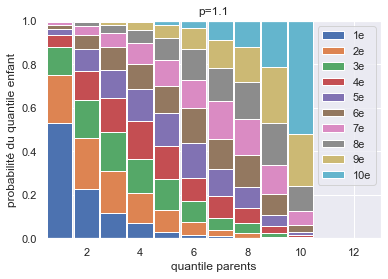

In [101]:
sns.set('notebook')
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

## Test : pj min

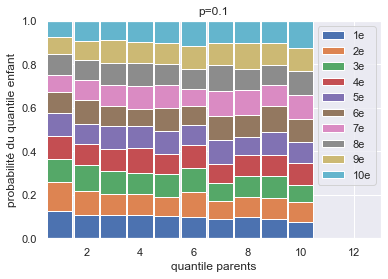

In [102]:
pj = df6['IGEincome'].min()                 # coefficient d'élasticité du pays j
nb_quantiles = 10       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon
y_child, y_parents = generate_incomes(n, pj)
y_child, y_parents
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions_0(sample, nb_quantiles)
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

In [103]:
df6 = pd.merge(df6, df2[['country', 'gdpppp']], on='country', how='left')

In [104]:
df6.head()

,country,1,2,3,4,5,6,7,8,9,...,97,98,99,100,gini,revenu_moyen,IGEincome,Region,IGE2,gdpppp
0,ALB,728.89795,916.66235,1010.91600,1086.90780,1132.69970,1171.14120,1201.1324,1240.8976,1285.69140,...,6822.3184,7775.8910,9351.7510,17754.324,0.304624,2965.181137,0.8,Europe & Central Asia,0.40,7297.0
1,ARG,254.08942,470.50150,623.45420,734.97455,832.31850,918.40800,1012.4612,1106.3810,1185.00710,...,18226.7300,20528.3050,24444.9500,43669.242,0.449902,5789.989260,0.7,Latin America & Caribbean,0.66,13220.0
2,ARM,366.61780,535.32733,611.64560,658.33940,690.84710,721.91000,753.8348,784.9140,809.08760,...,3466.6650,3758.6018,4320.2896,6566.159,0.263108,1612.262788,0.4,Europe & Central Asia,0.40,5611.0
3,AUT,2958.07640,4893.46730,5459.64900,5923.58540,6380.27800,6779.26460,7056.4434,7316.1816,7581.05470,...,36080.9020,39450.5550,44950.3120,72216.680,0.278279,16472.874244,0.2,Europe & Central Asia,0.40,36193.0
4,AZE,397.53983,597.77320,705.47003,785.52610,841.75244,889.26465,932.3291,966.5682,1000.89575,...,5802.6380,6366.0590,7459.7114,12023.727,0.312321,2334.091234,0.5,Europe & Central Asia,0.50,8101.0


In [105]:
# Multiplication de chaque ligne du df par 1000
df7 = pd.concat([df6]*1000)

In [106]:
list_columns = list(df7.columns[1:101])

In [107]:
df7 = df7.reset_index()

In [108]:
# Ajout des variables comme le DF original
df8 = pd.melt(df7, id_vars=[ 'country', 'gini', 'IGEincome', 'revenu_moyen', 'gdpppp'], value_vars=list_columns)

In [109]:
df8.head()

,country,gini,IGEincome,revenu_moyen,gdpppp,variable,value
0,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795
1,ARG,0.449902,0.7,5789.989260,13220.0,1,254.08942
2,ARM,0.263108,0.4,1612.262788,5611.0,1,366.61780
3,AUT,0.278279,0.2,16472.874244,36193.0,1,2958.07640
4,AZE,0.312321,0.5,2334.091234,8101.0,1,397.53983


In [110]:
df9 = df8[['country', 'IGEincome']].drop_duplicates()

In [111]:
df9.head()

,country,IGEincome
0,ALB,0.8
1,ARG,0.7
2,ARM,0.4
3,AUT,0.2
4,AZE,0.5


## Question n°9 : Application des probabiltés conditionnelles

In [112]:
list_pj = round(df9['IGEincome'],3) #liste des pj (trié par ordre alphabétique)

In [113]:
df8.columns = ['country', 'gini', 'elasticity', 'revenu_moyen', 'gdpppp', 'quantiles_enf', 'revenu_classe'] # changement de noms des colonnes

In [114]:
df8 = df8.sort_values(['country', 'quantiles_enf']) # Triage

In [115]:
df8.head()

,country,gini,elasticity,revenu_moyen,gdpppp,quantiles_enf,revenu_classe
0,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795
116,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795
232,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795
348,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795
464,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795


In [116]:
# Vérification si de l'ordre des pays entre le df8 et le df9
df9['country'].unique() == df8['country'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [117]:
# Paramètre
nb_quantiles = 100  
n = nb_quantiles * 1000   

In [118]:
pj_list = np.round(df9['IGEincome'],3)

## Création de la boucle for pour créer les probabilités conditionnelles des classes parents par pays. 

In [119]:
%%time
final_list = []
for pj in pj_list:
    y_child, y_parents = generate_incomes(n, pj)        
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample, nb_quantiles)
    final_list.extend(cd)
# Opération assez longue (environ 35 secondes sur mon ordinateur)

Wall time: 36 s


In [120]:
# Ajout des classes parents
df8['classe_parents'] = final_list

In [121]:
df8.head()

,country,gini,elasticity,revenu_moyen,gdpppp,quantiles_enf,revenu_classe,classe_parents
0,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
116,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
232,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
348,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
464,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1


In [122]:
# Exemple
df8[(df8['quantiles_enf'] == 70)&(df8['classe_parents'] == 5)].sort_values('elasticity').head()

,country,gini,elasticity,revenu_moyen,gdpppp,quantiles_enf,revenu_classe,classe_parents
8008782,DNK,0.259871,0.1,16874.405039,34130.0,70,18328.377,5
8008556,FIN,0.276857,0.1,16144.884419,33626.0,70,17835.383,5
8008440,FIN,0.276857,0.1,16144.884419,33626.0,70,17835.383,5
8008324,FIN,0.276857,0.1,16144.884419,33626.0,70,17835.383,5
8008208,FIN,0.276857,0.1,16144.884419,33626.0,70,17835.383,5


# ANOVA

In [123]:
import statsmodels.api as sm
from scipy import stats as sp

In [124]:
df11 = df8[['country', 'gini', 'elasticity', 'revenu_moyen', 'gdpppp']].drop_duplicates()
df11.head()

,country,gini,elasticity,revenu_moyen,gdpppp
0,ALB,0.304624,0.8,2965.181137,7297.0
1,ARG,0.449902,0.7,5789.989260,13220.0
2,ARM,0.263108,0.4,1612.262788,5611.0
3,AUT,0.278279,0.2,16472.874244,36193.0
4,AZE,0.312321,0.5,2334.091234,8101.0


In [125]:
df11.sort_values('gini', ascending=False)

,country,gini,elasticity,revenu_moyen,gdpppp
115,ZAF,0.669779,0.7,5562.288691,9602.0
41,HND,0.601667,0.7,3263.638056,3628.0
21,COL,0.569271,1.1,3511.892048,8185.0
40,GTM,0.568293,1.0,2121.267758,4367.0
14,CAF,0.561732,0.7,803.272790,685.0
...,...,...,...,...,...
108,UKR,0.255140,0.4,3316.228572,6721.0
98,SWE,0.254887,0.3,16023.985402,34371.0
24,CZE,0.252864,0.4,8153.758356,23223.0
96,SVK,0.247219,0.6,6036.220165,20515.0


In [126]:
import statsmodels.formula.api as smf

In [127]:
df12 = pd.melt(df6, id_vars=['country', 'gini', 'IGEincome', 'revenu_moyen', 'gdpppp'], value_vars=list_columns )

In [128]:
df12.head()

,country,gini,IGEincome,revenu_moyen,gdpppp,variable,value
0,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795
1,ARG,0.449902,0.7,5789.989260,13220.0,1,254.08942
2,ARM,0.263108,0.4,1612.262788,5611.0,1,366.61780
3,AUT,0.278279,0.2,16472.874244,36193.0,1,2958.07640
4,AZE,0.312321,0.5,2334.091234,8101.0,1,397.53983


In [129]:
reg_anova = smf.ols('value ~ C(country)', data= df12).fit()

In [130]:
reg_anova.summary()
# R²= 0.496
# F-stat -> 98.43
# Prob(F-stat) -> 0
# --> regression significative à un niveau de 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     98.43
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:54:08   Log-Likelihood:            -1.1862e+05
No. Observations:               11600   AIC:                         2.375e+05
Df Residuals:                   11484   BIC:                         2.383e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2994.8299    671.390      4.461      0.000    1678.790    4310.870
C(country)[T.ARG]  2853.0548    949.489      3.005      0.003     991.893    4714.216
C(country)[T.ARM] -1366.4471    949.489     -1.439      0.150   -3227.608     494.714
C(country)[T.AUT]  1.364e+04    949.489     14.369      0.000    1.18e+04    1.55e+04
C(country)[T.AZE]  -637.4009    949.489     -0.671      0.502   -2498.562    1223.760
C(country)[T.BEL]  1.203e+04    949.489     12.670      0.000    1.02e+04    1.39e+04
C(country)[T.BFA] -2076.8772    949.489     -2.187      0.029   -3938.039    -215.716
C(country)[T.BGD] -1996.1375    949.489     -2.102      0.036   -3857.299    -134.976
C(country)[T.BGR]  1990.1487    949.489      2.096      0.036     128.987    3851.310
C(country)[T.BIH]  3339.8574    949.489      3.518      0.000    1478.696    5201.019
C(country)[T.BLR]   926.3336    949.489      0.976      0.329    -934.828    2787.495
C(country)[T.BOL]    21.4339    949.489      0.023      0.982   -1839.727    1882.595
C(country)[T.BRA]  1812.6547    949.489      1.909      0.056     -48.507    3673.816
C(country)[T.BTN] -1478.9008    949.489     -1.558      0.119   -3340.062     382.260
C(country)[T.CAF] -2183.5300    949.489     -2.300      0.021   -4044.691    -322.369
C(country)[T.CAN]  2.074e+04    949.489     21.848      0.000    1.89e+04    2.26e+04
C(country)[T.CHL]  4056.7801    949.489      4.273      0.000    2195.619    5917.941
C(country)[T.CHN]  -472.0712    949.489     -0.497      0.619   -2333.232    1389.090
C(country)[T.CIV] -2594.9947    949.489     -2.733      0.006   -4456.156    -733.833
C(country)[T.CMR] -1200.3359    949.489     -1.264      0.206   -3061.497     660.825
C(country)[T.COD] -2718.8139    949.489     -2.863      0.004   -4579.975    -857.653
C(country)[T.COL]   552.1754    949.489      0.582      0.561   -1308.986    2413.337
C(country)[T.CRI]  2585.5567    949.489      2.723      0.006     724.395    4446.718
C(country)[T.CYP]  1.435e+04    949.489     15.114      0.000    1.25e+04    1.62e+04
C(country)[T.CZE]  5240.4635    949.489      5.519      0.000    3379.302    7101.625
C(country)[T.DEU]  1.507e+04    949.489     15.868      0.000    1.32e+04    1.69e+04
C(country)[T.DNK]  1.405e+04    949.489     14.796      0.000    1.22e+04    1.59e+04
C(country)[T.DOM]   563.5722    949.489      0.594      0.553   -1297.589    2424.733
C(country)[T.ECU]   388.9111    949.489      0.410      0.682   -1472.250    2250.072
C(country)[T.EGY] -1025.2525    949.489     -1.080      0.280   -2886.414     835.909
C(country)[T.ESP]  1.012e+04    949.489     10.661      0.000    8261.002     1.2e+04
C(country)[T.EST]  4707.2327    949.489      4.958      0.000    2846.071    6568.394
C(country)[T.FIN]  1.331e+04    949.489     14.020      0.000    1.15e+04

In [131]:
sum(reg_anova.pvalues < 0.05) / sum(reg_anova.pvalues < 1)

0.646551724137931

64.66% des pays ont une p-value inférieur à notre seuil alpha de 5%. Notre objectif étant d'avoir un modèle qui fonctionne pour la plupart des pays, ce résultat est peu satisfaisant.

# Vérification des hypothèses

##  1) Les résidus des populations étudiées suivent une distribution normale

In [132]:
sns.set('talk')

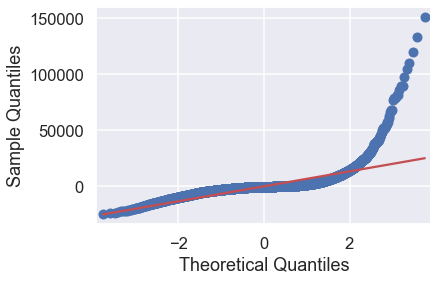

In [133]:
sm.qqplot(reg_anova.resid, dist='norm',line='s')
plt.savefig('qqplot')
plt.show()

In [134]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(reg_anova.resid)
lzip(name, test)

[('Jarque-Bera', 4207431.5421603285),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 6.739339356074631),
 ('Kurtosis', 95.32202335877444)]

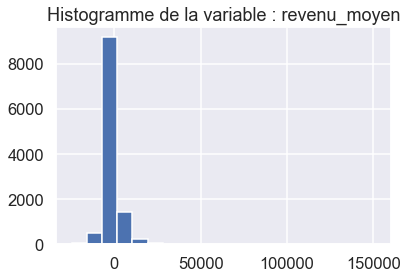

In [135]:
plt.hist(reg_anova.resid, bins=20)
plt.title('Histogramme de la variable : revenu_moyen' )
plt.savefig('hist_anova')
plt.show()

La distribution des données sur cet histogramme s'approche d'une loi normale

In [136]:
import scipy.stats as stats

## 2) Les variances des populations sont toutes égales (HOMOSCEDASTICITE)

In [137]:
list = []
list.append(df.country)

In [138]:
df12['resid'] = reg_anova.resid

In [139]:
list_homo = []
for country in df12.country.unique():
    x = df12.resid[df12.country == country ]
    list_homo.append(x)

In [140]:
stats.bartlett(*list_homo)

BartlettResult(statistic=19602.442043071907, pvalue=0.0)

In [141]:
stats.levene(*list_homo)

LeveneResult(statistic=25.124465722034987, pvalue=0.0)

Pour les tests de Bartlett et Levene, l'hypothèse nulle est que les variance sont égales. Ici, nous pouvons rejeter l'hypothèse nulle. L'hypothèse d'égalité des variances n'est donc pas respecté

## 3) Les échantillons sont prélevés aléatoirement et indépendamment dans les populations.

Oui, les données sont représentatives de la population

In [142]:
fra_inc = df12[(df12['country'] == 'FRA')]

In [143]:
fra_inc

,country,gini,IGEincome,revenu_moyen,gdpppp,variable,value,resid
34,FRA,0.329096,0.4,18128.129541,30357.0,1,2958.3040,-15351.103545
150,FRA,0.329096,0.4,18128.129541,30357.0,2,4412.6753,-13896.732245
266,FRA,0.329096,0.4,18128.129541,30357.0,3,4939.6350,-13369.772545
382,FRA,0.329096,0.4,18128.129541,30357.0,4,5422.9165,-12886.491045
498,FRA,0.329096,0.4,18128.129541,30357.0,5,5906.5376,-12402.869945
...,...,...,...,...,...,...,...,...
11054,FRA,0.329096,0.4,18128.129541,30357.0,96,39873.5100,21564.102455
11170,FRA,0.329096,0.4,18128.129541,30357.0,97,43693.0350,25383.627455
11286,FRA,0.329096,0.4,18128.129541,30357.0,98,49489.5820,31180.174455
11402,FRA,0.329096,0.4,18128.129541,30357.0,99,60758.6130,42449.205455


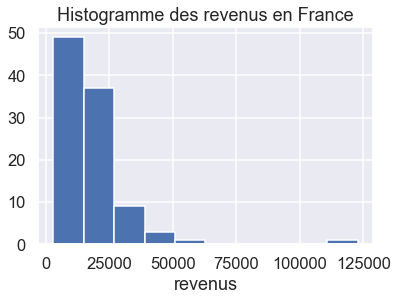

In [144]:
plt.hist(fra_inc['value'])
plt.xlabel('revenus')
plt.title('Histogramme des revenus en France')
plt.savefig('hist_rev_1')

## ANOVA version log

In [145]:
df12['value_log'] = np.log(df12['value'])

In [146]:
fra_inc = df12[(df12['country'] == 'FRA')]

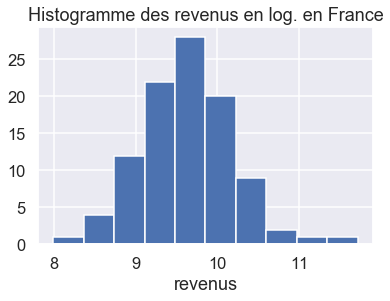

In [147]:
plt.hist(fra_inc['value_log'])
plt.xlabel('revenus')
plt.title('Histogramme des revenus en log. en France')
plt.savefig('hist_rev_2')

In [148]:
reg_anova_log = smf.ols('value_log ~ C(country)', data= df12).fit()

In [149]:
reg_anova_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              value_log   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     269.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:54:10   Log-Likelihood:                -12627.
No. Observations:               11600   AIC:                         2.549e+04
Df Residuals:                   11484   BIC:                         2.634e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.8517      0.072    108.711      0.000       7.710       7.993
C(country)[T.ARG]     0.4503      0.102      4.409      0.000       0.250       0.651
C(country)[T.ARM]    -0.5698      0.102     -5.578      0.000      -0.770      -0.370
C(country)[T.AUT]     1.7383      0.102     17.018      0.000       1.538       1.938
C(country)[T.AZE]    -0.2478      0.102     -2.426      0.015      -0.448      -0.048
C(country)[T.BEL]     1.6256      0.102     15.915      0.000       1.425       1.826
C(country)[T.BFA]    -1.2919      0.102    -12.648      0.000      -1.492      -1.092
C(country)[T.BGD]    -1.1071      0.102    -10.839      0.000      -1.307      -0.907
C(country)[T.BGR]     0.4234      0.102      4.146      0.000       0.223       0.624
C(country)[T.BIH]     0.6881      0.102      6.736      0.000       0.488       0.888
C(country)[T.BLR]     0.3059      0.102      2.994      0.003       0.106       0.506
C(country)[T.BOL]    -0.4927      0.102     -4.823      0.000      -0.693      -0.292
C(country)[T.BRA]     0.0789      0.102      0.773      0.440      -0.121       0.279
C(country)[T.BTN]    -0.7669      0.102     -7.509      0.000      -0.967      -0.567
C(country)[T.CAF]    -1.7210      0.102    -16.849      0.000      -1.921      -1.521
C(country)[T.CAN]     1.9628      0.102     19.216      0.000       1.763       2.163
C(country)[T.CHL]     0.5107      0.102      5.000      0.000       0.310       0.711
C(country)[T.CHN]    -0.4538      0.102     -4.442      0.000      -0.654      -0.254
C(country)[T.CIV]    -2.1571      0.102    -21.119      0.000      -2.357      -1.957
C(country)[T.CMR]    -0.6061      0.102     -5.934      0.000      -0.806      -0.406
C(country)[T.COD]    -2.5637      0.102    -25.100      0.000      -2.764      -2.363
C(country)[T.COL]    -0.2953      0.102     -2.891      0.004      -0.496      -0.095
C(country)[T.CRI]     0.3491      0.102      3.418      0.001       0.149       0.549
C(country)[T.CYP]     1.7782      0.102     17.409      0.000       1.578       1.978
C(country)[T.CZE]     1.0542      0.102     10.321      0.000       0.854       1.254
C(country)[T.DEU]     1.7885      0.102     17.510      0.000       1.588       1.989
C(country)[T.DNK]     1.7707      0.102     17.335      0.000       1.570       1.971
C(country)[T.DOM]    -0.1183      0.102     -1.158      0.247      -0.319       0.082
C(country)[T.ECU]    -0.2007      0.102     -1.965      0.049      -0.401      -0.001
C(country)[T.EGY]    -0.4473      0.102     -4.380      0.000      -0.648      -0.247
C(country)[T.ESP]     1.4575      0.102     14.270      0.000       1.257       1.658
C(country)[T.EST]     0.9424      0.102      9.226      0.000       0.742       1.143
C(country)[T.FIN]     1.7185      0.102     16.825      0.000       1.518

In [150]:
sum(reg_anova_log.pvalues < 0.05) / sum(reg_anova_log.pvalues < 1)

0.9137931034482759

In [151]:
reg_anova_log.pvalues > 0.05

Intercept            False
C(country)[T.ARG]    False
C(country)[T.ARM]    False
C(country)[T.AUT]    False
C(country)[T.AZE]    False
                     ...  
C(country)[T.VEN]     True
C(country)[T.VNM]    False
C(country)[T.XKX]    False
C(country)[T.YEM]    False
C(country)[T.ZAF]     True
Length: 116, dtype: bool

In [152]:
p_value_anova_log = pd.DataFrame(reg_anova_log.pvalues)
p_value_anova_log_sup_alpha = p_value_anova_log[p_value_anova_log[0] > 0.05]
p_value_anova_log_sup_alpha = p_value_anova_log_sup_alpha.reset_index()

In [153]:
p_value_anova_log_sup_alpha = p_value_anova_log_sup_alpha['index'].str.slice(start=-4, stop=-1)

In [154]:
p_value_anova_log_sup_alpha = p_value_anova_log_sup_alpha.values

In [155]:
df11[df11['country'].isin(p_value_anova_log_sup_alpha)]

,country,gini,elasticity,revenu_moyen,gdpppp
12,BRA,0.544494,0.6,4759.891127,9559.0000
27,DOM,0.502524,0.7,3523.175376,7505.0000
52,JOR,0.337725,0.5,3018.449854,5082.9316
68,MEX,0.507989,0.7,3847.361739,13434.0000
84,PAN,0.531917,1.0,5084.301678,11767.0000
85,PER,0.478034,0.7,3297.562504,7858.0000
91,ROU,0.373422,0.4,3285.486062,11782.0000
108,UKR,0.255140,0.4,3316.228572,6721.0000
111,VEN,0.434021,0.7,3135.794123,11756.0000
115,ZAF,0.669779,0.7,5562.288691,9602.0000


## Vérification des hypothèses

### 1) Normalité des résidus

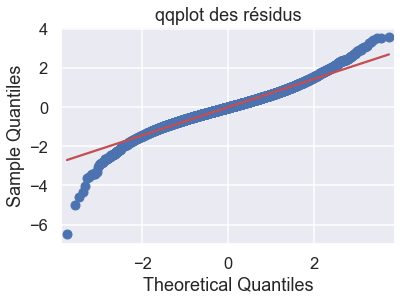

In [156]:
sm.qqplot(reg_anova_log.resid, dist='norm',line='s')
plt.savefig('qqplot')
plt.title('qqplot des résidus')
plt.show()

In [157]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(reg_anova_log.resid)
lzip(name, test)

[('Jarque-Bera', 3415.5951408217725),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.0643121371134519),
 ('Kurtosis', 5.655222093026695)]

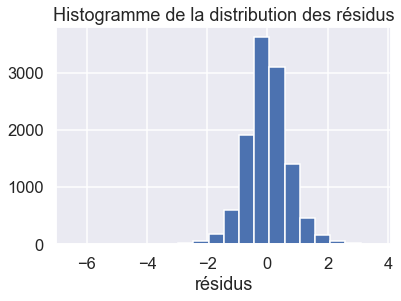

In [158]:
plt.hist(reg_anova_log.resid, bins=20)
plt.title('Histogramme de la distribution des résidus' )
plt.xlabel('résidus')
plt.savefig('hist_anova')
plt.show()

In [159]:
df12['resid_log'] = reg_anova_log.resid

list_homo_log = []
for country in df12.country.unique():
    x = df12.resid_log[df12.country == country ]
    list_homo_log.append(x)

### 2) Homoscédasticité

In [160]:
stats.bartlett(*list_homo_log)

BartlettResult(statistic=1514.6039754570786, pvalue=1.2342403736736203e-242)

In [161]:
stats.levene(*list_homo_log)

LeveneResult(statistic=9.588551984194892, pvalue=2.788142942255456e-152)

### 3) Les échantillons sont prélevés aléatoirement et indépendamment dans les populations.

On garde la même hypothèse que lors de la première régression.

# Régressions

In [162]:
import scipy.stats as stats

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
from sklearn.model_selection import train_test_split

## Regression : Revenu classe / ( gini, revenu moyen)

In [165]:
df8.head()

,country,gini,elasticity,revenu_moyen,gdpppp,quantiles_enf,revenu_classe,classe_parents
0,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
116,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
232,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
348,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1
464,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1


In [166]:
X = df8[['gini', 'revenu_moyen']].values

In [167]:
Y = df8['revenu_classe'].values

In [168]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split( X, Y, test_size=0.2, random_state=0)

In [169]:
temp1 = pd.DataFrame({'x1' : X_train1[:,0], 'x2' : X_train1[:,1], 'y' : Y_train1 })
reg1 = smf.ols(formula='y ~ x1 + x2', data= temp1).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 4.578e+06
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:54:16   Log-Likelihood:            -9.4887e+07
No. Observations:             9280000   AIC:                         1.898e+08
Df Residuals:                 9279997   BIC:                         1.898e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9274     11.104      0.354      0.724     -17.835      25.690
x1            -3.8217     26.220     -0.146      0.884     -55.212      47.569
x2             1.0093      0.000   2827.930      0.000       1.009       1.010
==============================================================================
Omnibus:                 11669973.104   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3357039998.392
Skew:                           6.731   Prob(JB):                         0.00
Kurtosis:                      95.200   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La p-value pour x1 (coefficient de gini) n'est pas significative

## Regression : Revenu moyen / log

In [170]:
df8['revenu_moyen_log'] = np.log(df8['revenu_moyen'])

# Quel puissance en base e donne ce nombre

In [171]:
df8['revenu_classe_log'] = np.log(df8['revenu_classe'])

In [172]:
df8

,country,gini,elasticity,revenu_moyen,gdpppp,quantiles_enf,revenu_classe,classe_parents,revenu_moyen_log,revenu_classe_log
0,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1,7.994693,6.591534
116,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1,7.994693,6.591534
232,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1,7.994693,6.591534
348,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1,7.994693,6.591534
464,ALB,0.304624,0.8,2965.181137,7297.0,1,728.89795,1,7.994693,6.591534
...,...,...,...,...,...,...,...,...,...,...
11599535,ZAF,0.669779,0.7,5562.288691,9602.0,100,82408.55000,100,8.623765,11.319444
11599651,ZAF,0.669779,0.7,5562.288691,9602.0,100,82408.55000,100,8.623765,11.319444
11599767,ZAF,0.669779,0.7,5562.288691,9602.0,100,82408.55000,100,8.623765,11.319444
11599883,ZAF,0.669779,0.7,5562.288691,9602.0,100,82408.55000,100,8.623765,11.319444


In [173]:
df8b = df8.reset_index()

In [174]:
# revenu_classe en fonction gini, revenu_moyen_log
X = df8b[['gini', 'revenu_moyen_log', 'index']].values
Y = df8b['revenu_classe'].values
X_train2, X_test2, Y_train2, Y_test2 = train_test_split( X, Y, test_size=0.2, random_state=0)
temp2 = pd.DataFrame({'index':X_train2[:,2], 'x1' : X_train2[:,0], 'x2' : X_train2[:,1], 'y' : Y_train2 })
reg2 = smf.ols(formula='y ~ x1 + x2', data= temp2).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                 3.042e+06
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:54:23   Log-Likelihood:            -9.5733e+07
No. Observations:             9280000   AIC:                         1.915e+08
Df Residuals:                 9279997   BIC:                         1.915e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.01e+04     22.924  -1312.989      0.000   -3.01e+04   -3.01e+04
x1         -9516.0291     27.858   -341.587      0.000   -9570.630   -9461.428
x2          4911.6612      2.171   2262.555      0.000    4907.406    4915.916
==============================================================================
Omnibus:                 11226916.175   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2543803469.240
Skew:                           6.343   Prob(JB):                         0.00
Kurtosis:                      83.111   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# revenu_classe_log en fonction gini, revenu_moyen_log
X = df8b[['gini', 'revenu_moyen_log', 'index']].values
Y = df8b['revenu_classe_log'].values
X_train2, X_test2, Y_train2, Y_test2 = train_test_split( X, Y, test_size=0.2, random_state=0)
temp2 = pd.DataFrame({'index':X_train2[:,2],'x1' : X_train2[:,0], 'x2' : X_train2[:,1], 'y' : Y_train2 })
reg2 = smf.ols(formula='y ~ x1 + x2', data= temp2).fit()
reg2.summary()

## Regression : Revenu moyen + classe revenu parent

In [ ]:
# revenu_classe en fonction gini, revenu_moyen, classe_parents
X = df8[['classe_parents','revenu_moyen', 'gini']].values
Y = df8['revenu_classe'].values
X_train3, X_test3, Y_train3, Y_test3 = train_test_split( X, Y, test_size=0.2, random_state=0)
temp3 = pd.DataFrame({'x1' : X_train3[:,0], 'x2' : X_train3[:,1], 'x3' : X_train3[:,2], 'y' : Y_train3 })
reg3 = smf.ols(formula='y ~ x1 + x2 + x3', data= temp3).fit()
reg3.summary()

La p-value pour x3 (coefficient de gini) n'est pas significative

## Regression : Revenu moyen + classe revenu parent / log

In [ ]:
# revenu_classe_log en fonction gini, revenu_moyen, classe_parents
X = df8[['classe_parents','revenu_moyen', 'gini']].values
Y = df8['revenu_classe_log'].values
X_train4, X_test4, Y_train4, Y_test4 = train_test_split( X, Y, test_size=0.2, random_state=0)
temp4 = pd.DataFrame({'x1' : X_train4[:,0], 'x2' : X_train4[:,1], 'x3' : X_train4[:,2], 'y' : Y_train4 })
reg4 = smf.ols(formula='y ~ x1 + x2 + x3', data= temp4).fit()
reg4.summary()

In [ ]:
# revenu_classe_log en fonction gini, revenu_moyen_log, classe_parents
X = df8b[['classe_parents','revenu_moyen_log', 'gini','index']].values
Y = df8b['revenu_classe_log'].values
X_train4, X_test4, Y_train4, Y_test4 = train_test_split( X, Y, test_size=0.2, random_state=0)
temp4 = pd.DataFrame({'index':X_train2[:,2],'x1' : X_train4[:,0], 'x2' : X_train4[:,1], 'x3' : X_train4[:,2], 'y' : Y_train4 })
reg4 = smf.ols(formula='y ~ x1 + x2 + x3', data= temp4).fit()
reg4.summary()

# Analyse des résultats des modèles pertinents

Je sélectionne les deux modélisations faisant intervenir les transformations des revenus en logarithme :
- reg2
- reg4

In [ ]:
alpha = 0.05

In [ ]:
n1 = temp2.shape[0]
n2 = temp4.shape[0]
p1 = 3
p2 = 4

In [ ]:
analyses1 = pd.DataFrame({'obs':np.arange(0, n1)})
#analyses['obs'].astype('float', inplace=True)

In [ ]:
analyses2 = pd.DataFrame({'obs':np.arange(0, n2)})
#analyses['obs'].astype('float', inplace=True)

## Analyse Regression n°2 revenu_classe_log ~ gini + revenu_moyen_log


### Calcul des leviers

In [ ]:
analyses1['levier'] = reg2.get_influence().hat_matrix_diag

seuil_levier1 = 2*p1/n1

In [ ]:
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Calcul des résidus studentisés

In [ ]:
analyses1['rstudent'] = reg2.get_influence().resid_studentized_internal
seuil_rstudent1 = t.ppf(1-alpha/2,n1-p1-1)

### Détermination de la distance de cook

In [ ]:
influence = reg2.get_influence().cooks_distance[0]

In [ ]:
analyses1['dcooks'] = influence
seuil_dcook1 = 4/(n1-p1)

### Vérification de la colinéarité des variables

In [ ]:
variables = reg2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

Tous les coefficient sont inférieurs à 10, les variables ne sont pas colinéaires

### Test de l'homoscédasticité

In [ ]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg2.resid, variables)
print('p value test Breusch Pagan:', pval)

On rejette donc l'hypothèse nulle : 'les variances sont égales'. Le test d'homoscédasticité n'est pas concluant

### Test de la normalité des résidus

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(reg2.resid)
lzip(name,test)

## Regression n°2 revenu_classe_log ~ gini + revenu_moyen_log sans les valeurs influentes et atypiques

In [ ]:
obs_a_retirer1 = analyses1[(analyses1.levier > seuil_levier1) & (analyses1.rstudent > seuil_rstudent1) & (analyses1.dcooks > seuil_dcook1)]

In [ ]:
len(obs_a_retirer1)

In [ ]:
len(obs_a_retirer1)/ len(temp2)

In [ ]:
temp2_v2 = temp2[~temp2.index.isin(obs_a_retirer1.obs)]

In [ ]:
temp2_v3 = temp2[temp2.index.isin(obs_a_retirer1.obs)]

In [ ]:
reg2_v2 = smf.ols(formula='y ~ x1 + x2', data= temp2_v2).fit()
reg2_v2.summary()

In [ ]:
obs_ret1 = df8b[df8b['index'].isin(temp2_v3['index'])]

In [ ]:
obs_ret1.sort_values('quantiles_enf')

In [ ]:
sns.set('talk')
plt.hist(obs_ret1.quantiles_enf)
plt.title('Quantile des classes des individus des observations retirées')
plt.savefig('hist__obs_ret_classe_1')
plt.show()

In [ ]:
sns.set('talk')
plt.hist(obs_ret1.classe_parents)
plt.title('Quantile des classes parents des observations retirées')
plt.show()

In [ ]:
obs_ret1.country.value_counts()

In [ ]:
labels = obs_ret1.country.value_counts().index

fig, ax = plt.subplots()
ax.pie(obs_ret1.country.value_counts(), labels=labels, autopct='%.2f')
ax.set_title('''Pays d'origine des observations retirées''')
fig.set_size_inches(8,8)
plt.savefig('pie_obs_ret_pays_1')
plt.show()

In [ ]:
variables = reg2_v2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

In [ ]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg2_v2.resid, variables)
print('p value test Breusch Pagan:', pval)

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(reg2_v2.resid)
lzip(name,test)

## Analyse Regression n°4 revenu_classe_log ~ gini + revenu_moyen_log + revenu_parent


In [ ]:
analyses2['levier'] = reg4.get_influence().hat_matrix_diag
seuil_levier2 = 2*p2/n2

analyses2['rstudent'] = reg4.get_influence().resid_studentized_internal
seuil_rstudent2 = t.ppf(1-alpha/2,n2-p2-1)
influence = reg4.get_influence().cooks_distance[0]

analyses2['dcooks'] = influence
seuil_dcook2 = 4/(n2-p2)

### Vérification de la colinéarité des variables

In [ ]:
variables = reg4.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

Tous les coefficient sont inférieurs à 10, les variables ne sont pas colinéaires

### Test de l'homoscédasticité

In [ ]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg4.resid, variables)
print('p value test Breusch Pagan:', pval)

### Test de la normalité des résidus

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(reg4.resid)
lzip(name,test)

## Regression n°4 revenu_classe_log ~ gini + revenu_moyen_log + revenu_parent sans les valeurs influentes et atypiques

In [ ]:
obs_a_retirer2 = analyses2[(analyses2.levier > seuil_levier2) & (analyses2.rstudent > seuil_rstudent2) & (analyses2.dcooks > seuil_dcook2)]

temp4_v2 = temp4[~temp4.index.isin(obs_a_retirer2.obs)]
temp4_v3 = temp4[temp4.index.isin(obs_a_retirer2.obs)]

reg4 = smf.ols(formula='y ~ x1 + x2 + x3', data= temp4_v2).fit()
reg4.summary()

In [ ]:
len(obs_a_retirer2)/ len(temp4)

In [ ]:
obs_ret2 = df8b[df8b['index'].isin(temp4_v3['index'])]

In [ ]:
plt.hist(obs_ret2.quantiles_enf)
plt.title('Quantile des classes des individus des observations retirées')
plt.savefig('hist__obs_ret_classe_2')
plt.show()

In [ ]:
plt.hist(obs_ret2.classe_parents)
plt.title('Quantile des classes parents des observations retirées')
plt.show()

In [ ]:
labels = obs_ret2.country.value_counts().index

In [ ]:
fig, ax = plt.subplots()
ax.pie(obs_ret2.country.value_counts(), labels=labels, autopct='%.2f')
ax.set_title('''Pays d'origine des observations retirées''')
fig.set_size_inches(8,8)
plt.savefig('pie_obs_ret_pays_2')
plt.show()